# Ví dụ về Multilayer Perceptron với tập MNIST

Xây dựng mạng fully connected với 2 lớp ẩn sử dụng Tensorflow

## Tổng quan về Neural Network

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

## Tập dữ liệu MNIST

Ví dụ này sử dụng tập ảnh chữ số viết tay MNIST. MNIST gồm 60,000 ảnh cho huấn luyện và 10,000 ảnh cho kiểm thử mô hình. Mọi ảnh chữ số viết tay trong tập dữ liệu được chuẩn hóa về kích thước, cụ thể là (28x28) với giá trị pixels nằm trong khoảng 0 đến 1. Để đơn giản bài troán, mỗi ảnh được trải phẳng thành mảng numpy một chiều (784 thành phần)

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

Tham khảo: http://yann.lecun.com/exdb/mnist/

### Tải về dữ liệu MNIST

In [0]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf

### Siêu tham số

In [0]:
# Parameters
learning_rate = 0.1
num_steps = 500
batch_size = 128
display_step = 100

### Tham số mô hình

In [0]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

### Đặt đầu vào cho graph

In [0]:
# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

### Khai báo trọng số mô hình

In [0]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

### Xây dựng mô hình

In [0]:
# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [8]:
# Construct model
logits = neural_net(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



### Huấn luyện và kiểm thử mô hình

In [24]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))
    preds = tf.argmax(logits, 1)
    preds = sess.run(preds, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels})
   

Step 1, Minibatch Loss= 7378.4917, Training Accuracy= 0.477
Step 100, Minibatch Loss= 303.1895, Training Accuracy= 0.883
Step 200, Minibatch Loss= 199.4149, Training Accuracy= 0.914
Step 300, Minibatch Loss= 99.4908, Training Accuracy= 0.891
Step 400, Minibatch Loss= 64.9738, Training Accuracy= 0.875
Step 500, Minibatch Loss= 52.3955, Training Accuracy= 0.812
Optimization Finished!
Testing Accuracy: 0.8491
[7 2 1 ... 4 5 6]


### Xem thử một vài ví dụ mà mô hình dự đoán

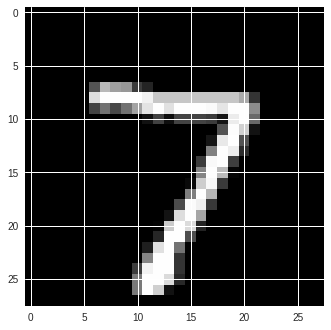

Kết quả dự đoán: 7


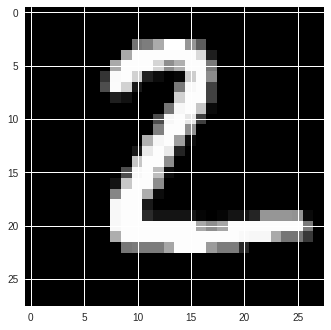

Kết quả dự đoán: 2


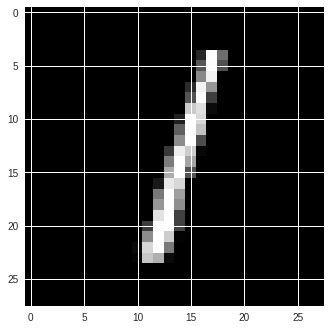

Kết quả dự đoán: 1


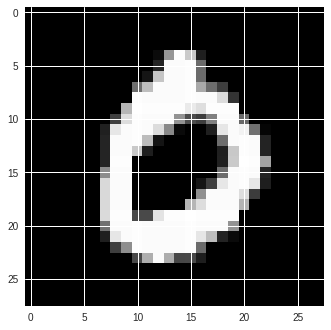

Kết quả dự đoán: 0


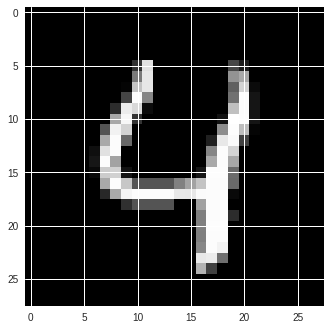

Kết quả dự đoán: 4


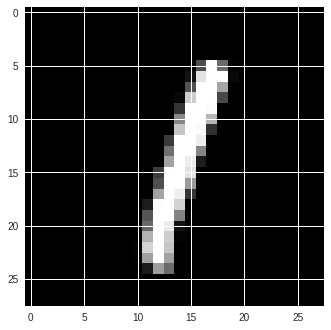

Kết quả dự đoán: 1


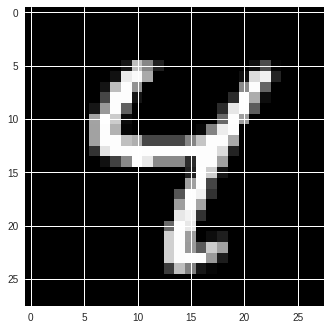

Kết quả dự đoán: 4


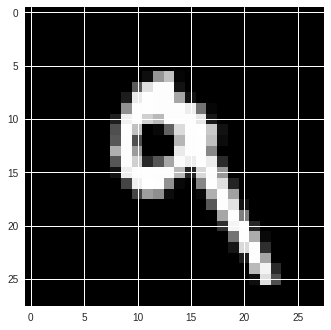

Kết quả dự đoán: 9


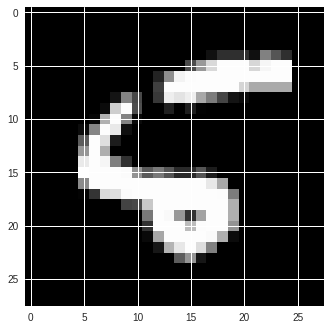

Kết quả dự đoán: 5


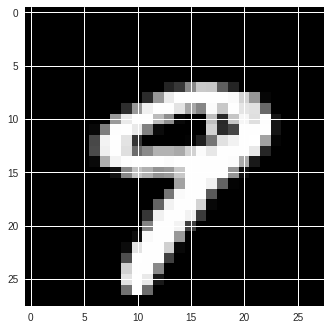

Kết quả dự đoán: 9


In [28]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(10):
    plt.imshow(np.reshape(mnist.test.images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Kết quả dự đoán:", preds[i])